<a href="https://colab.research.google.com/github/JuanM07-sena/Analisis-de-datos/blob/main/An%C3%A1lisisDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS EXPLORATORIO DE DATOS
## Hecho por Juan Marín
### 3066474
### Actividades a realizar:
- Importar y cargar los datos elegidos.

- Realizar una revisión inicial de su estructura (tipos de variables, dimensiones, valores faltantes, etc.).

- Aplicar procesos básicos de limpieza o transformación si son necesarios.

- Generar visualizaciones descriptivas como gráficos, tablas o estadísticas resumen.

- Identificar patrones, tendencias o posibles relaciones entre variables.

- Presentar tus observaciones finales destacando los principales hallazgos del análisis.


In [ ]:
# Importar librerías
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [10]:
#Importar y cargar los datos elegidos.
# Lectura
from google.colab import drive;
drive.mount('gdrive');
ruta = '/content/gdrive/MyDrive/AnalisisLoteria/Ventas_del_Juego_de_Lotería_Tradicional_20251124.csv'
data = pd.read_csv(ruta)




Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [52]:
# Tipos de datos por columna
print("\nTipos de datos:")
print(data.dtypes)
print (data.shape)
data.head()




Tipos de datos:
Año             int64
Mes             int64
Loteria        object
Ventas          int64
Ventas_Log    float64
dtype: object
(2469, 5)


,Año,Mes,Loteria,Ventas,Ventas_Log
0,2012,1,Lotería De Cundinamarca,3486162000,21.97
1,2012,1,Lotería De Manizales,1105227500,20.82
2,2012,1,Lotería De Bogotá,3943016000,22.10
3,2012,1,Lotería De Boyacá,5310285000,22.39
4,2012,1,Lotería Del Valle,2314432500,21.56


# Realizar una revisión inicial de su estructura (tipos de variables, dimensiones, valores faltantes, etc.).



In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Año      2469 non-null   object
 1   Mes      2469 non-null   int64 
 2   Loteria  2469 non-null   object
 3    Ventas  2469 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 77.3+ KB


/tmp/ipython-input-1008953422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30, ha='right')
/tmp/ipython-input-1008953422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30, ha='right')


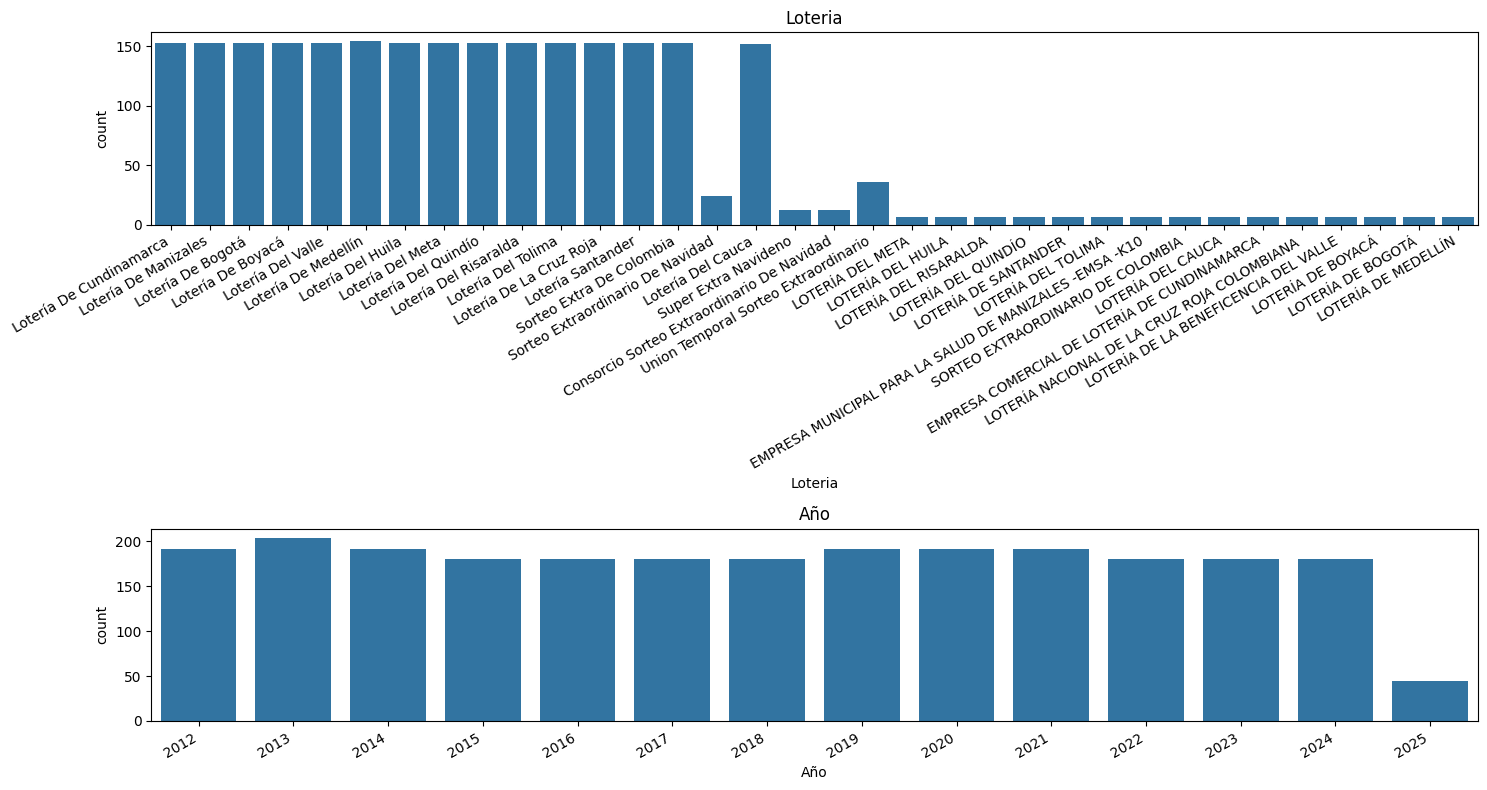

In [45]:

# Tomar las variables categóricas (type object), y generar gráficos de barras.
col_cat = ['Loteria', 'Año'];

# Gráficos de barras de conteo


fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

## Para la variable 'Loteria':

- Se observa que la 'Lotería De Cundinamarca' y la 'Lotería De Manizales' son las que tienen el mayor número de registros en el dataset, lo que podría indicar una mayor frecuencia de ventas o una mayor representatividad en el periodo de tiempo cubierto.
Existen otras loterías como 'Lotería Del Tolima' o 'Lotería De Medellín' que también tienen una presencia significativa, aunque ligeramente menor.
En general, el gráfico muestra la distribución de las distintas loterías, permitiendo identificar cuáles son las más recurrentes en los datos.

## Para la variable 'Año':

- El gráfico de 'Año' muestra la frecuencia de registros por cada año presente en el dataset.
Se puede observar que hay registros para los años 2012, 2013, 2014, 2015, 2016 y 2017.
Los años 2012, 2013 y 2014 parecen tener una cantidad de registros similar y relativamente alta, mientras que 2015, 2016 y 2017 tienen un número de registros decreciente, siendo 2017 el año con menos registros en el dataset. Esto podría indicar que los datos no son completos para los años más recientes o que la frecuencia de las ventas disminuyó en esos años.

In [26]:
data['Año'] = data['Año'].astype(str).str.replace(',', '').astype(int)



In [42]:


pd.options.display.float_format = '{:.2f}'.format

print("Resumen estadístico:")
display(data.describe())

Resumen estadístico:


,Año,Mes,Ventas,Ventas_Log
count,2469.00,2469.00,2469.00,2469.00
mean,2018.06,6.42,7454008959.50,20.61
std,3.84,3.48,109317864253.81,4.71
min,2012.00,1.00,0.00,0.00
25%,2015.00,3.00,1250661000.00,20.95
50%,2018.00,6.00,2231922000.00,21.53
75%,2021.00,9.00,4140216000.00,22.14
max,2025.00,12.00,3220000000000.00,28.80


In [29]:
data.rename(columns={' Ventas': 'Ventas'}, inplace=True)
print("Columna renombrada de ' Ventas' a 'Ventas'.")

Columna renombrada de ' Ventas' a 'Ventas'.


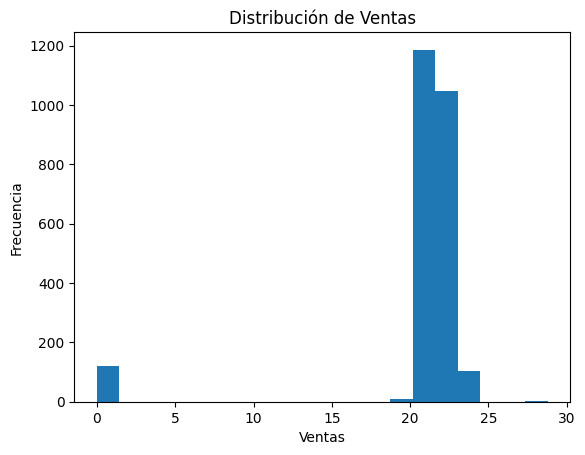

In [41]:
import numpy as np


ventas_log = np.log1p(data['Ventas'])
plt.hist(ventas_log, bins=20)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

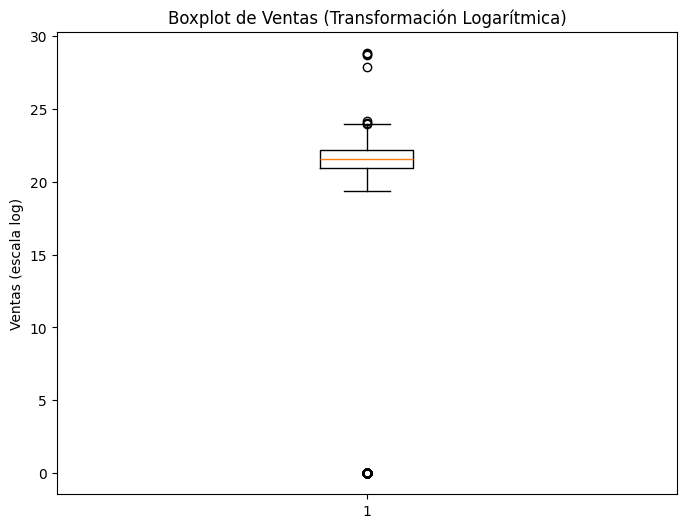

In [38]:
import numpy as np

data['Ventas_Log'] = np.log1p(data['Ventas'])
plt.figure(figsize=(8, 6))
plt.boxplot(data['Ventas_Log'])
plt.title('Boxplot de Ventas (Transformación Logarítmica)')
plt.ylabel('Ventas (escala log)')
plt.show()

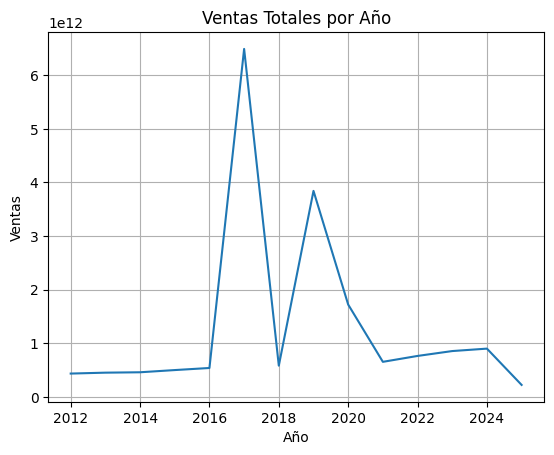

In [32]:
ventas_por_año = data.groupby('Año')['Ventas'].sum()

plt.plot(ventas_por_año.index, ventas_por_año.values)
plt.title('Ventas Totales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()


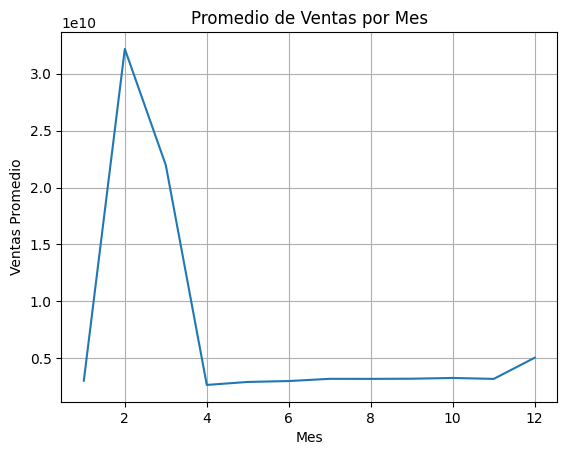

In [33]:
ventas_por_mes = data.groupby('Mes')['Ventas'].mean()

plt.plot(ventas_por_mes.index, ventas_por_mes.values)
plt.title('Promedio de Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.grid(True)
plt.show()


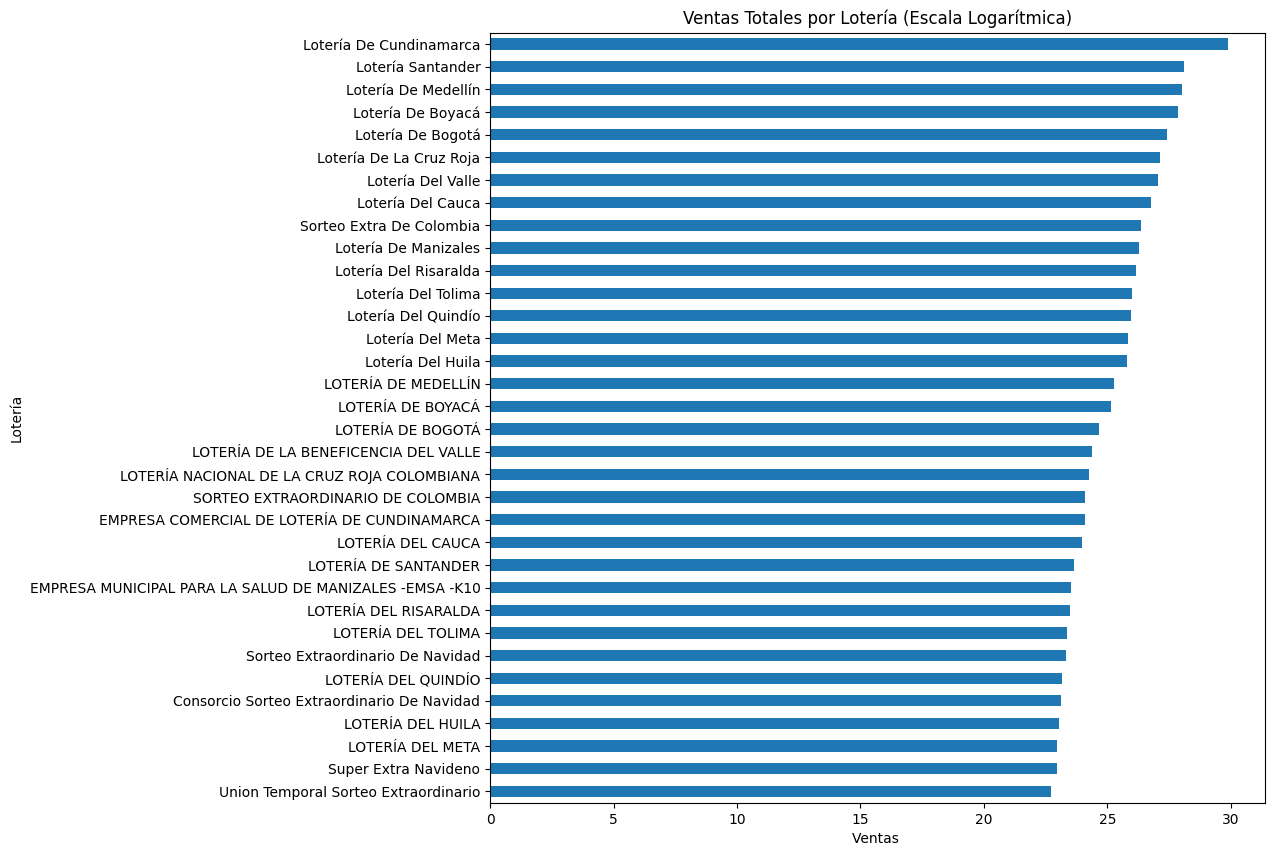

In [48]:


# 1. Calcular las ventas totales y aplicar la transformación logarítmica
ventas_log = np.log1p(data.groupby('Loteria')['Ventas'].sum()).sort_values(ascending=True)

# 2. Generar el gráfico de barras de manera horizontal
ventas_log.plot(kind='barh', figsize=(10, 10))

plt.title('Ventas Totales por Lotería (Escala Logarítmica)')
plt.ylabel('Lotería') # Ahora los campos de lotería se encuentran en el eje Y
plt.xlabel('Ventas ') # Ahora las ventas están en el eje X
plt.show()

# Conclusiones del Análisis de Datos
## El análisis exploratorio de los datos de ventas de lotería ha revelado varios puntos clave:

> Estructura y Limpieza de Datos:
-  El conjunto de datos (dataset) estaba en buena forma con información clara sobre el año, el mes, el nombre de la lotería y sus ventas. Solo se necesitó una limpieza muy sencilla (como arreglar el nombre de la columna ' Ventas' y convertir el 'Año' a números) para que los análisis funcionaran correctamente.

> Distribución de Ventas y Valores Atípicos:
- La columna 'Ventas' tiene una variación enorme. El gráfico de caja (boxplot) y los números mostraron que la mayoría de las ventas son pequeñas o medianas, pero hay numerosos puntos atípicos (ventas increíblemente altas). Esto quiere decir que hay eventos especiales que disparan los ingresos o que algunas loterías son excepcionalmente exitosas.

> Tendencias Temporales Anuales:
- Al mirar el total de ventas año tras año, se ve una tendencia general de crecimiento, aunque con altibajos notables. Es importante investigar qué causó esos años de grandes subidas o bajadas para entender lo que realmente impulsa el negocio.

> Patrones de Estacionalidad Mensual:
- El promedio de ventas por mes muestra un patrón claro que se repite cada año, con meses pico y meses bajos. Esto indica que las ventas de lotería están muy influenciadas por eventos específicos a lo largo del año, como temporadas festivas o promociones.

> Diferencias en el Rendimiento por Lotería:
- La comparación de ventas totales revela una gran desigualdad. Solo algunas loterías (como 'Lotería De Cundinamarca' y 'Lotería De Manizales') tienen un impacto mucho mayor en los ingresos generales que otras. Esta disparidad es clave para enfocar futuras estrategias de marketing y dónde se invierten los recursos.

En resumen, los datos de ventas de lotería tienen patrones que dependen del calendario (cada año y cada mes) y diferencias muy grandes entre las loterías, con la presencia notable de ventas gigantes que afectan el panorama general. Estos hallazgos son una base sólida para tomar decisiones estratégicas, ayudando a los operadores a enfocarse en las loterías más rentables, aprovechar los mejores meses y prepararse para los periodos de bajas ventas.